In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
intcols = df.loc[:, df.columns != 'BMI'].columns

for cols in intcols:
    df[cols] = df[cols].astype('int')

In [ ]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversampler = RandomOverSampler()
X_train_sampled, y_train_sampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_sampled, y_train_sampled)
X_train_scaled = scaler.transform(X_train_sampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
eda = df.copy()

In [ ]:
eda['Diabetes_012'] = eda['Diabetes_012'].replace({0:"No Diabetes", 1:"prediabetes", 2:"diabetes"})
eda['HighBP'] = eda['HighBP'].replace({0:"Low BP", 1:"High BP"})
eda['HighChol'] = eda['HighChol'].replace({0:"Low Chol", 1:"High Chol"})
eda['CholCheck'] = eda['CholCheck'].replace({0:"No chol check", 1:"Chol check"})
eda['Smoker'] = eda['Smoker'].replace({0:"No", 1:"Yes"})
eda['Stroke'] = eda['Stroke'].replace({0:"No", 1:"Yes"})
eda['HeartDiseaseorAttack'] = eda['HeartDiseaseorAttack'].replace({0:"No", 1:"Yes"})
eda['PhysActivity'] = eda['PhysActivity'].replace({0:"No", 1:"Yes"})
eda['Fruits'] = eda['Fruits'].replace({0:"No", 1:"Yes"})
eda['Veggies'] = eda['Veggies'].replace({0:"No", 1:"Yes"})
eda['HvyAlcoholConsump'] = eda['HvyAlcoholConsump'].replace({0:"No", 1:"Yes"})
eda['AnyHealthcare'] = eda['AnyHealthcare'].replace({0:"No", 1:"Yes"})
eda['NoDocbcCost'] = eda['NoDocbcCost'].replace({0:"No", 1:"Yes"})
eda['GenHlth'] = eda['GenHlth'].replace({1:"excellent", 2:"very good", 3:"good", 4:"fair", 5:"poor"})
eda['DiffWalk'] = eda['DiffWalk'].replace({0:"No", 1:"Yes"})

eda['Sex'] = eda['Sex'].replace({0:"Female", 1:"Male"})

eda['Age'] = eda['Age'].replace({1:"Age 18-24",
                                                         2:"Age 25-29",
                                                         3:"Age 30-34",
                                                         4:"Age 35-39",
                                                         5:"Age 40-44",
                                                         6:"Age 45-49",
                                                         7:"Age 50-54",
                                                         8:"Age 55-59",
                                                         9:"Age 60-64",
                                                         10:"Age 65-69",
                                                         11:"Age 70-74",
                                                         12:"Age 75-79",
                                                         13:"80 or older",
                                                         14:"Don't know/refused/missing"})

eda['Education'] = eda['Education'].replace({1:"Never attended school or only kindergarten",
                                                         2:"Grades 1 through 8 (Elementary)",
                                                         3:"Grades 9 through 11 (Some high school)",
                                                         4:"Grade 12 or GED (High school graduate) ",
                                                         5:"College 1 year to 3 years (Some college or technical school)",
                                                         6:"College 4 years or more (College graduate)",
                                                         9:"Refused"})

eda['Income'] = eda['Income'].replace({1:"< $10,000",
                                                         2:"< $15,000",
                                                         3:"< $20,000",
                                                         4:"< $25,000",
                                                         5:"< 35,000",
                                                         6:"< 50,000",
                                                         7:"< $75,000",
                                                         8:"$75,000 or more",
                                                         77:"Don't know / not sure",
                                                         99:"Refused"})

In [ ]:
eda.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Chol,Chol check,40,Yes,No,No,No,No,...,Yes,No,poor,18,15,Yes,Female,Age 60-64,Grade 12 or GED (High school graduate),"< $20,000"
1,No Diabetes,Low BP,Low Chol,No chol check,25,Yes,No,No,Yes,No,...,No,Yes,good,0,0,No,Female,Age 50-54,College 4 years or more (College graduate),"< $10,000"
2,No Diabetes,High BP,High Chol,Chol check,28,No,No,No,No,Yes,...,Yes,Yes,poor,30,30,Yes,Female,Age 60-64,Grade 12 or GED (High school graduate),"$75,000 or more"
3,No Diabetes,High BP,Low Chol,Chol check,27,No,No,No,Yes,Yes,...,Yes,No,very good,0,0,No,Female,Age 70-74,Grades 9 through 11 (Some high school),"< 50,000"
4,No Diabetes,High BP,High Chol,Chol check,24,No,No,No,Yes,Yes,...,Yes,No,very good,3,0,No,Female,Age 70-74,College 1 year to 3 years (Some college or tec...,"< $25,000"
5,No Diabetes,High BP,High Chol,Chol check,25,Yes,No,No,Yes,Yes,...,Yes,No,very good,0,2,No,Male,Age 65-69,College 4 years or more (College graduate),"$75,000 or more"
6,No Diabetes,High BP,Low Chol,Chol check,30,Yes,No,No,No,No,...,Yes,No,good,0,14,No,Female,Age 60-64,College 4 years or more (College graduate),"< $75,000"
7,No Diabetes,High BP,High Chol,Chol check,25,Yes,No,No,Yes,No,...,Yes,No,good,0,0,Yes,Female,Age 70-74,Grade 12 or GED (High school graduate),"< $25,000"
8,diabetes,High BP,High Chol,Chol check,30,Yes,No,Yes,No,Yes,...,Yes,No,poor,30,30,Yes,Female,Age 60-64,College 1 year to 3 years (Some college or tec...,"< $10,000"
9,No Diabetes,Low BP,Low Chol,Chol check,24,No,No,No,No,No,...,Yes,No,very good,0,0,No,Male,Age 55-59,Grade 12 or GED (High school graduate),"< $20,000"


Data Visualization

<ipython-input-18-bd5562d79ae3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(eda, x='Diabetes_012', palette='coolwarm')


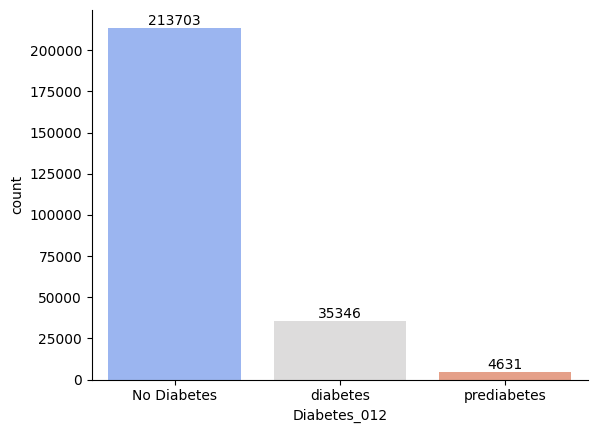

In [ ]:
#1 Category of Diabetes

ax = sns.countplot(eda, x='Diabetes_012', palette='coolwarm')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()

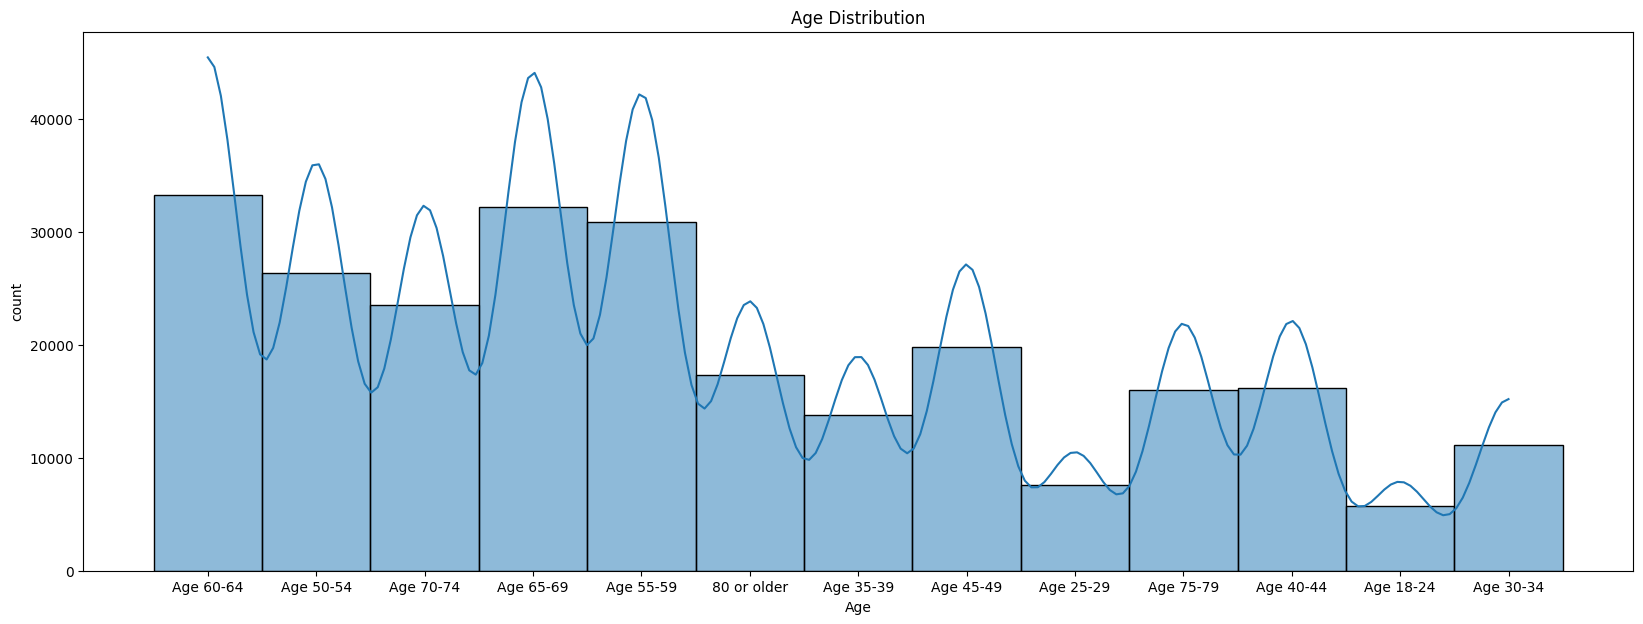

In [ ]:
plt.figure(figsize=(20,7))
sns.histplot(data=eda, x='Age',bins=20, kde= True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

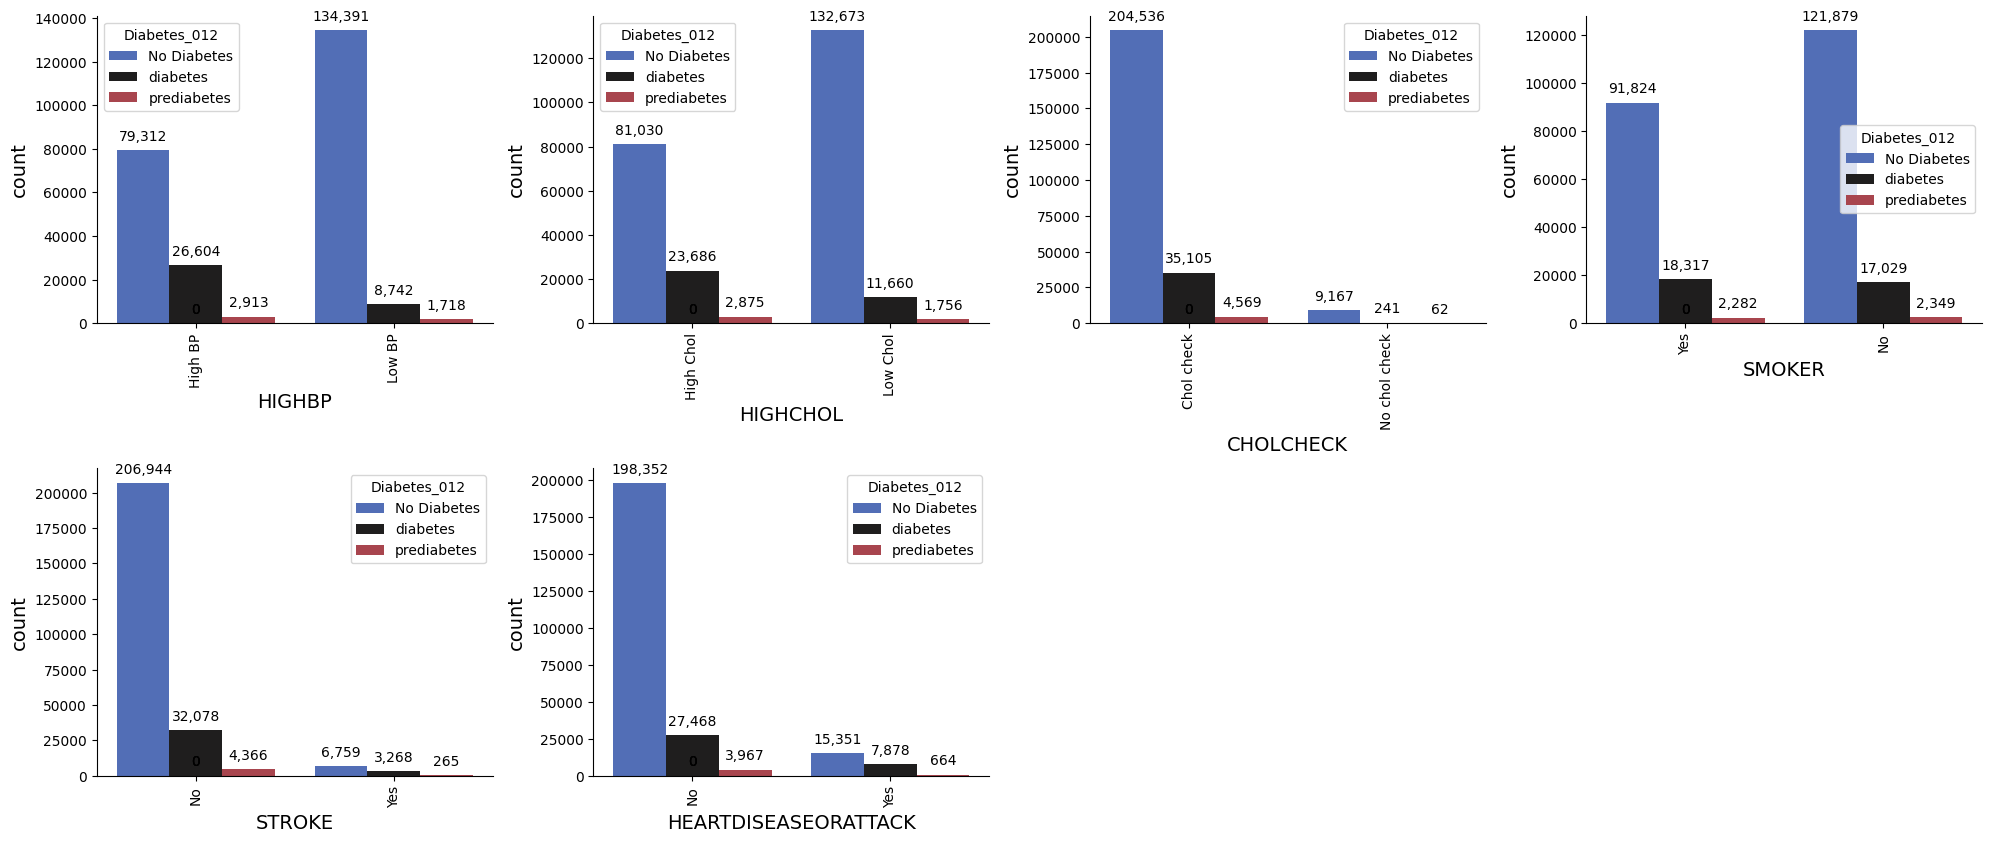

In [ ]:
#2 Health Conditions (HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack)

plt.figure(figsize=(20,17))
for index, column in enumerate(eda[["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack"]].columns):
    plt.subplot(4,4, index + 1)
    ax = sns.countplot(data=eda, x=column, hue='Diabetes_012', palette='icefire')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xticks(rotation=90)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

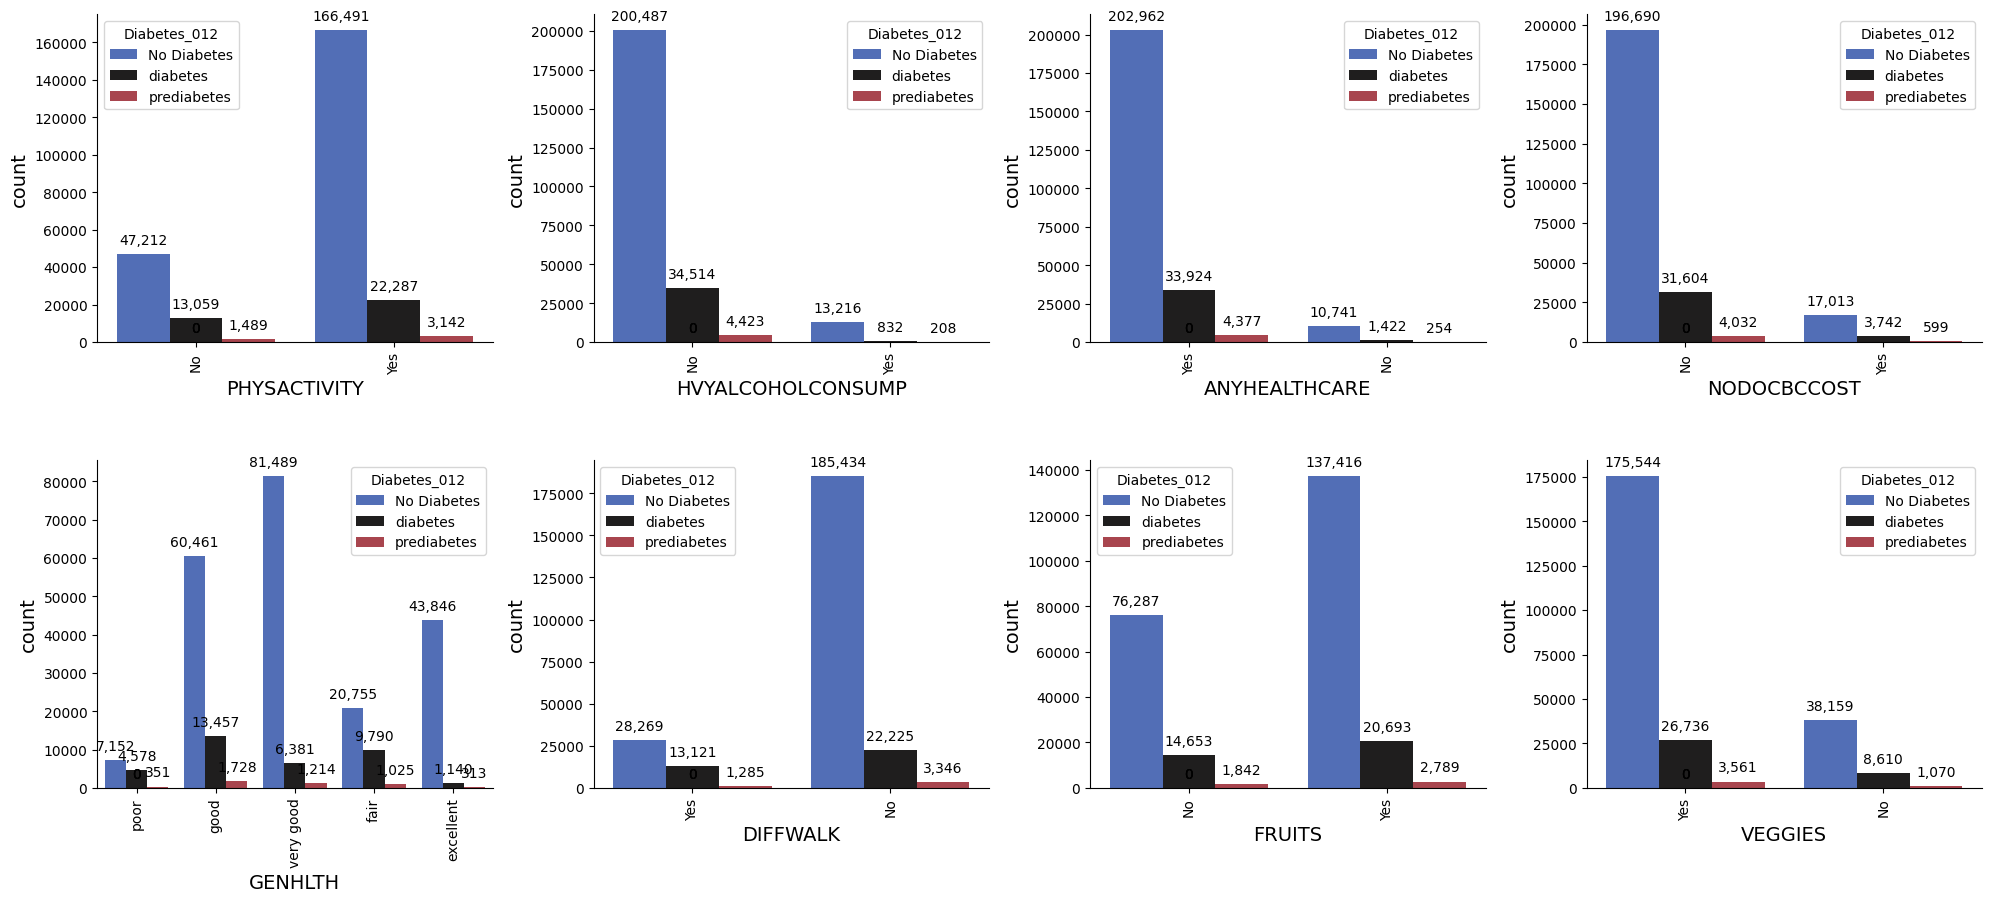

In [ ]:
#3 Lifestyle & Diet (PhysActivity, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Fruits, Veggies)

plt.figure(figsize=(20,17))
for index, column in enumerate(eda[["PhysActivity", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk","Fruits", "Veggies"]].columns):
    plt.subplot(4,4, index + 1)
    ax = sns.countplot(data=eda, x=column, hue='Diabetes_012', palette='icefire')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xticks(rotation=90)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

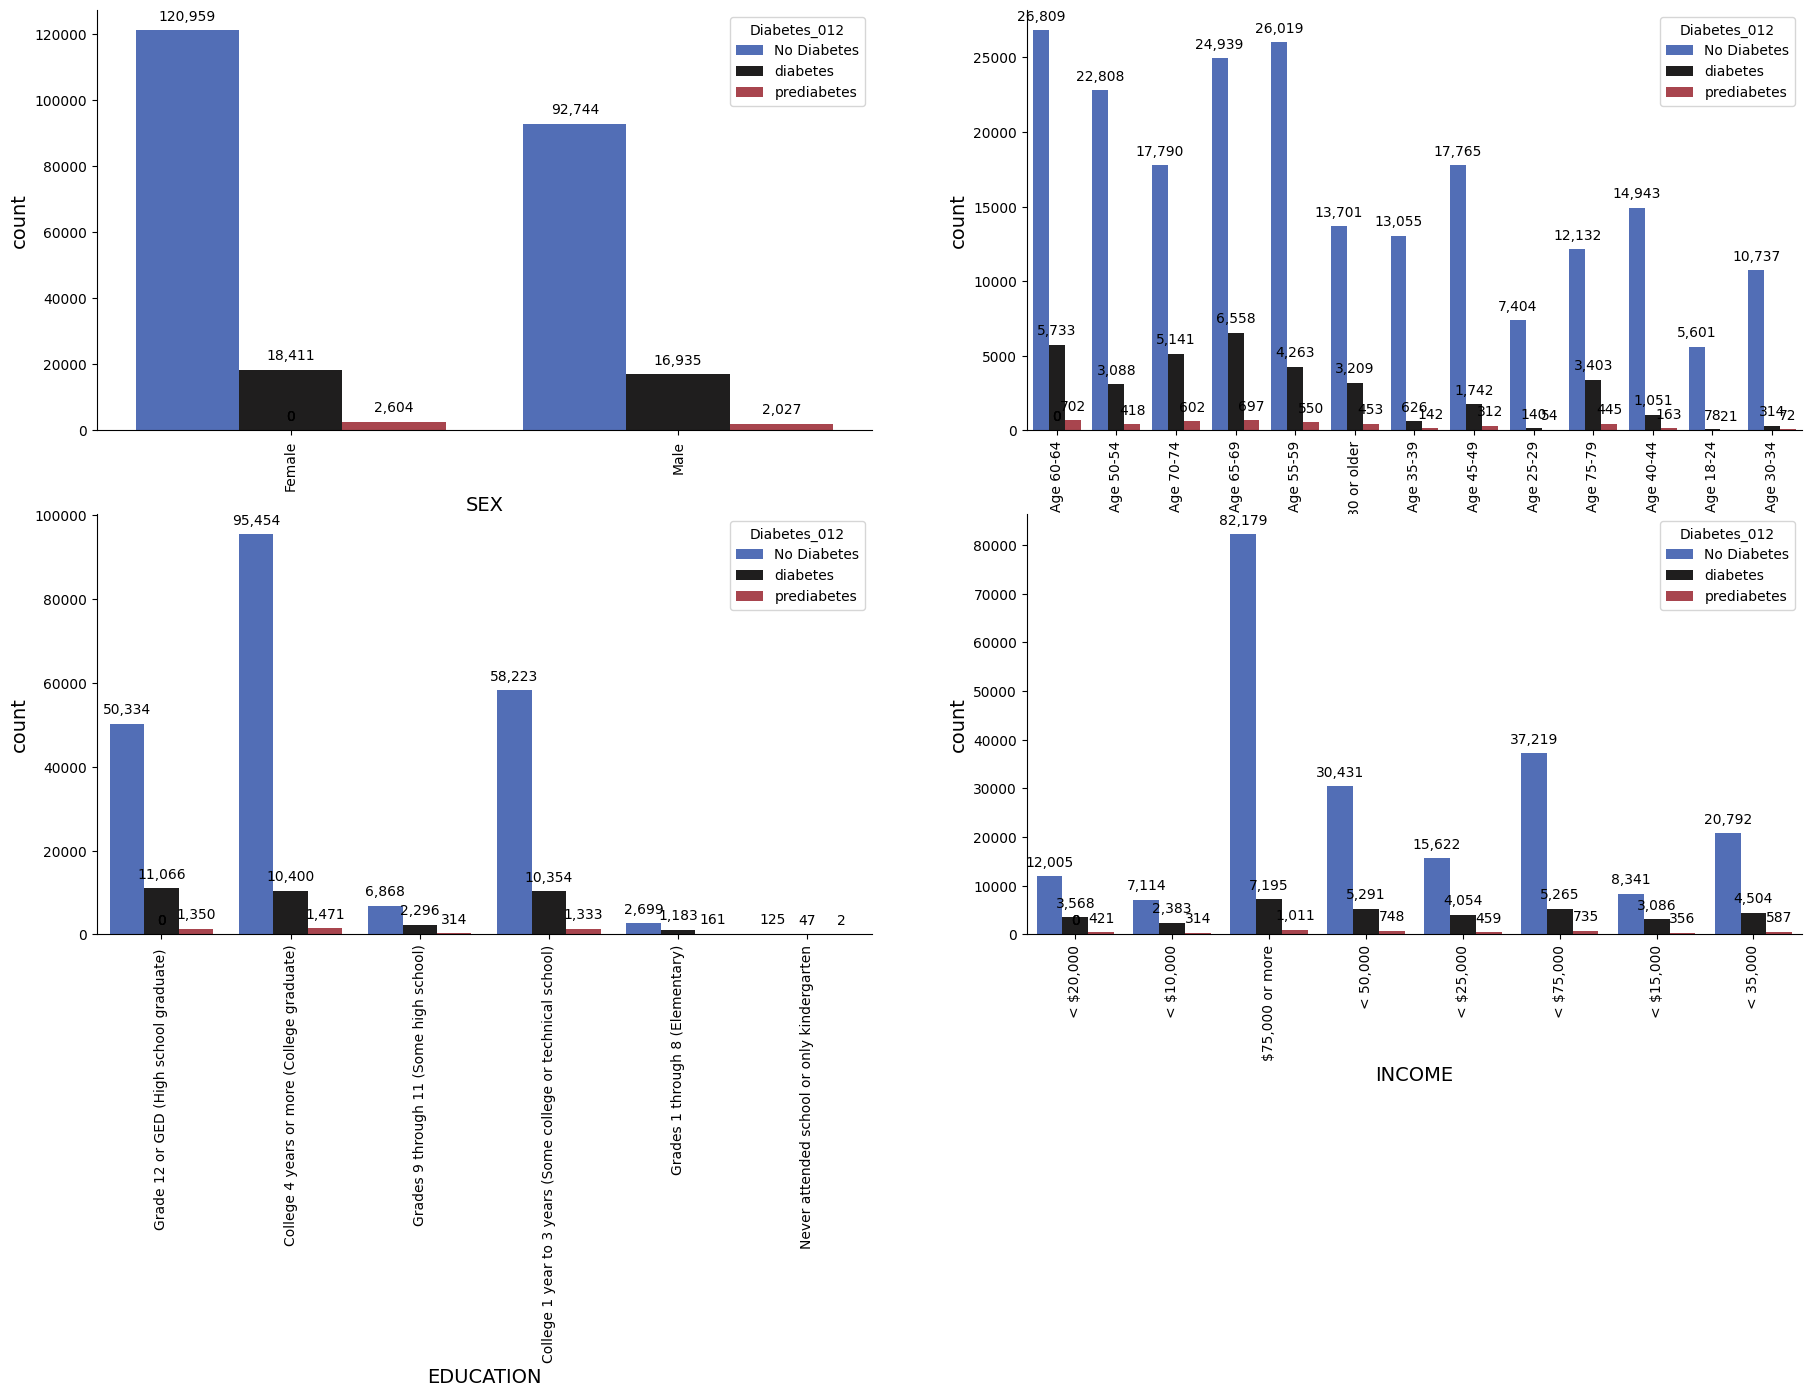

In [ ]:
#4 Demography (Sex, Age, Education, Income)

plt.figure(figsize=(22,12))
for index, column in enumerate(eda[["Sex", "Age", "Education", "Income"]].columns):
    plt.subplot(2,2, index + 1)
    ax = sns.countplot(data=eda, x=column, hue='Diabetes_012', palette='icefire')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xticks(rotation=90)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.show()

,BMI
Diabetes_012,
0,27.742521
1,30.724466
2,31.944011


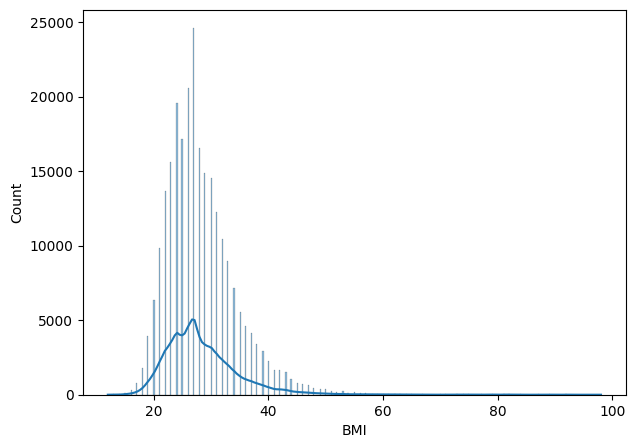

In [ ]:
#5 BMI Distribution and average BMI per diabetes categories

plt.figure(figsize=(7,5))
sns.histplot(df['BMI'], kde=True)
df.groupby("Diabetes_012", group_keys=False)[['BMI']].mean()

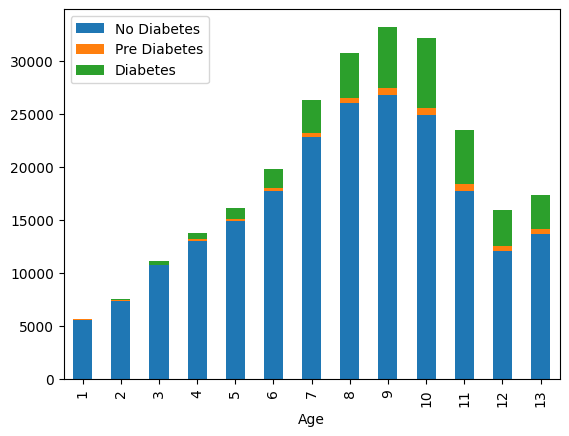

In [ ]:
#6 Age class distribution and diabetes categories per class
age_diabetes = pd.crosstab(df['Age'], df['Diabetes_012'])
age_diabetes.plot(kind='bar', stacked=True)
plt.legend(['No Diabetes', 'Pre Diabetes', 'Diabetes'])
plt.show()

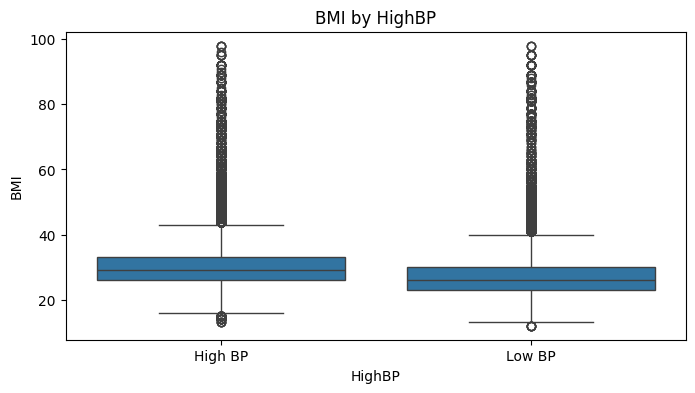

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=eda, x='HighBP', y='BMI')
plt.title('BMI by HighBP')
plt.xlabel('HighBP')
plt.ylabel('BMI')
plt.show()
